Indian Weather Trends Visualizer
Options:
1. Use existing CSV file
2. Generate sample data
Enter your choice (1 or 2): 1
Please enter the path to your weather CSV file: "C:\Users\aditi\Downloads\Bangalore_1990_2022_BangaloreCity.csv"
Successfully loaded data from C:\Users\aditi\Downloads\Bangalore_1990_2022_BangaloreCity.csv

Remaining columns in dataset: ['time', 'tavg', 'tmin', 'tmax', 'prcp']


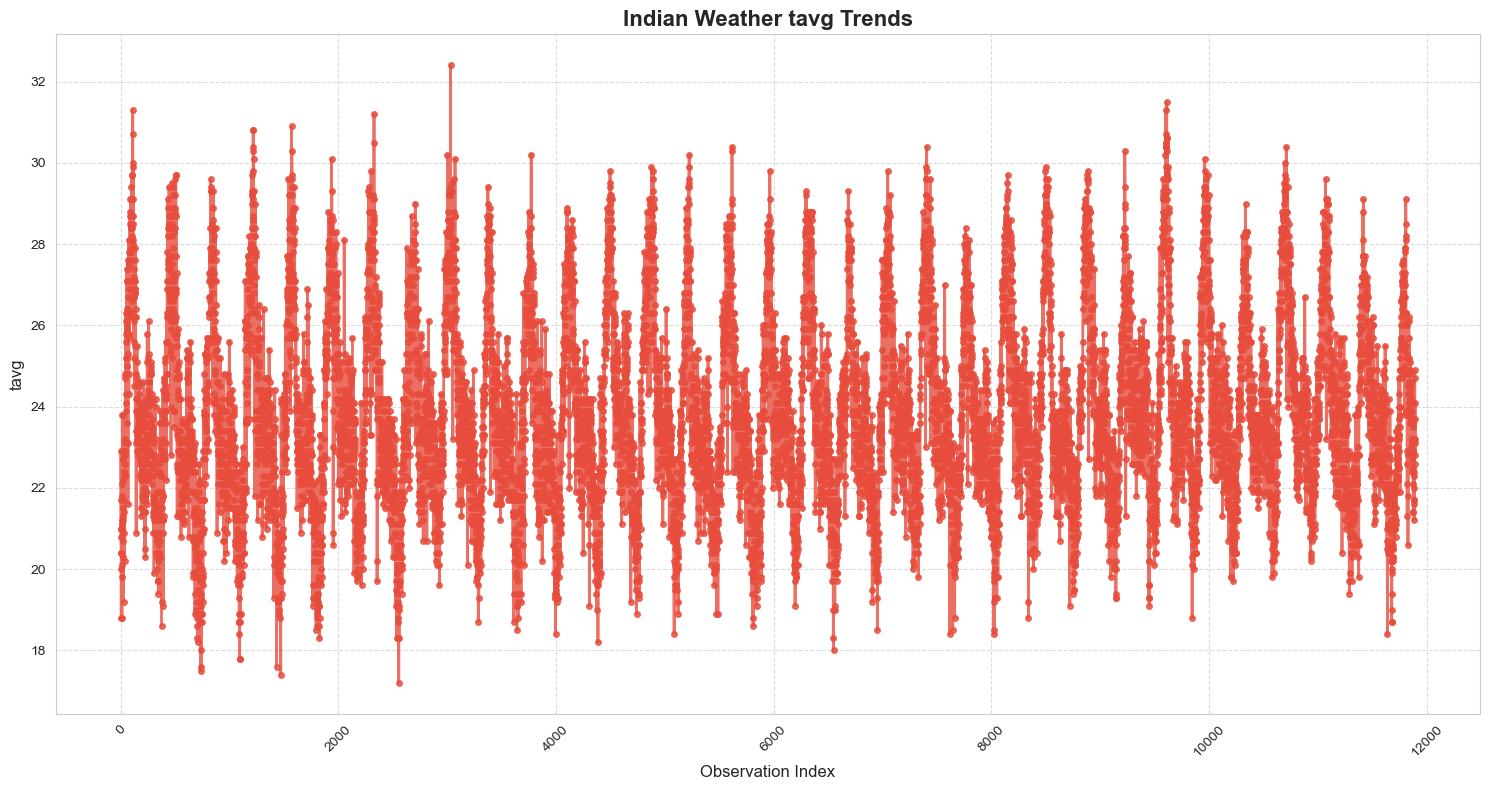

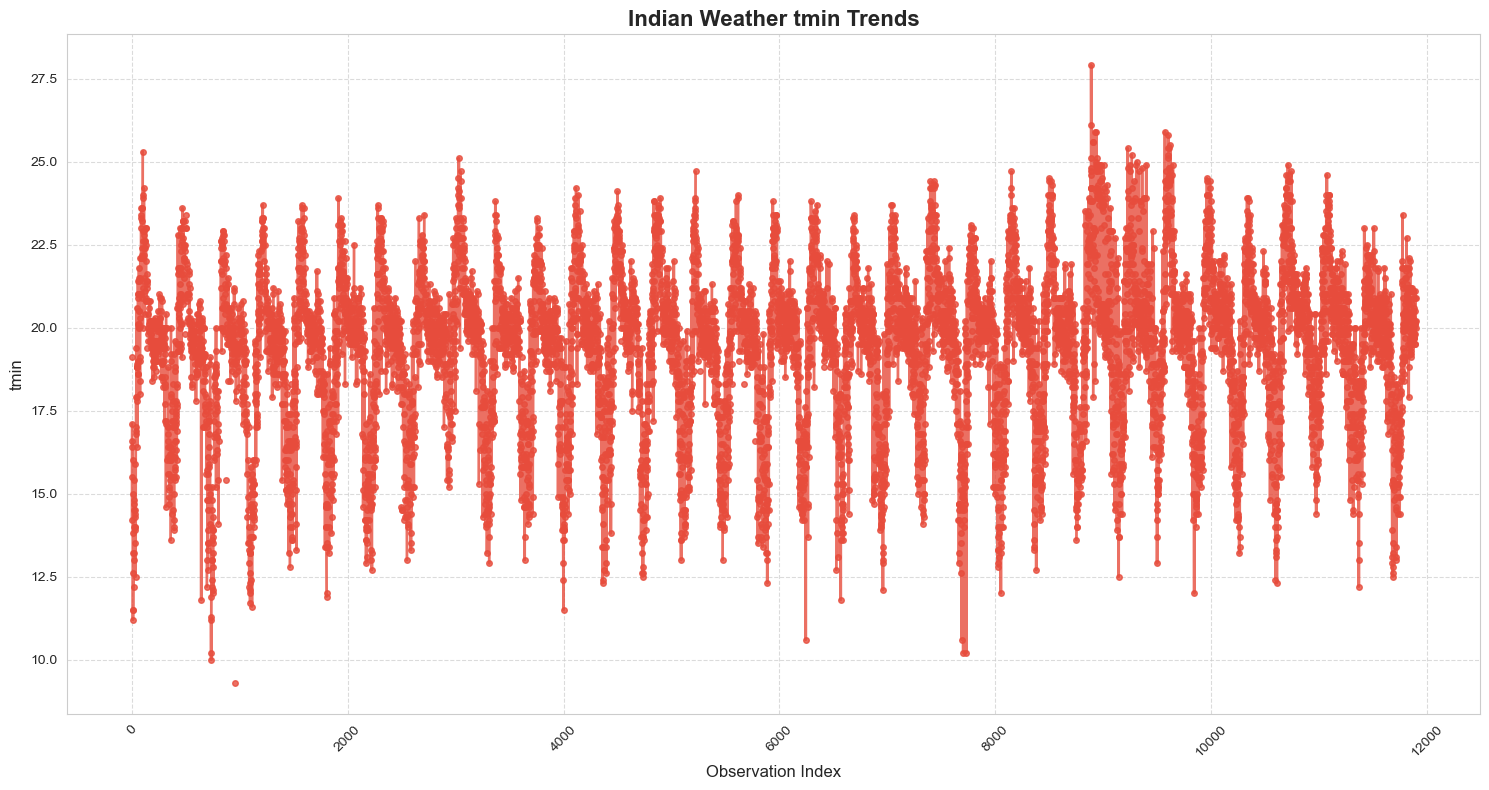

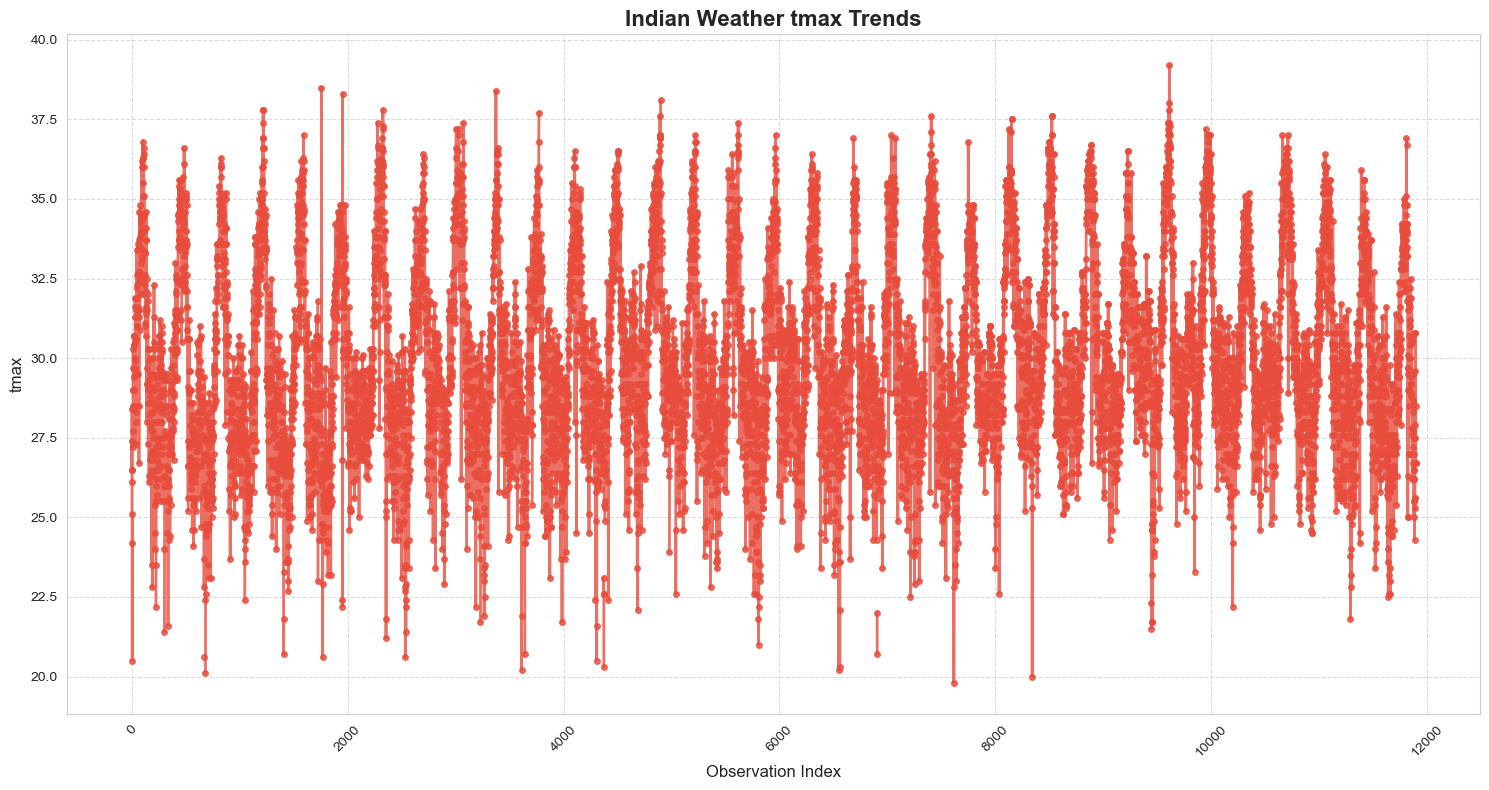

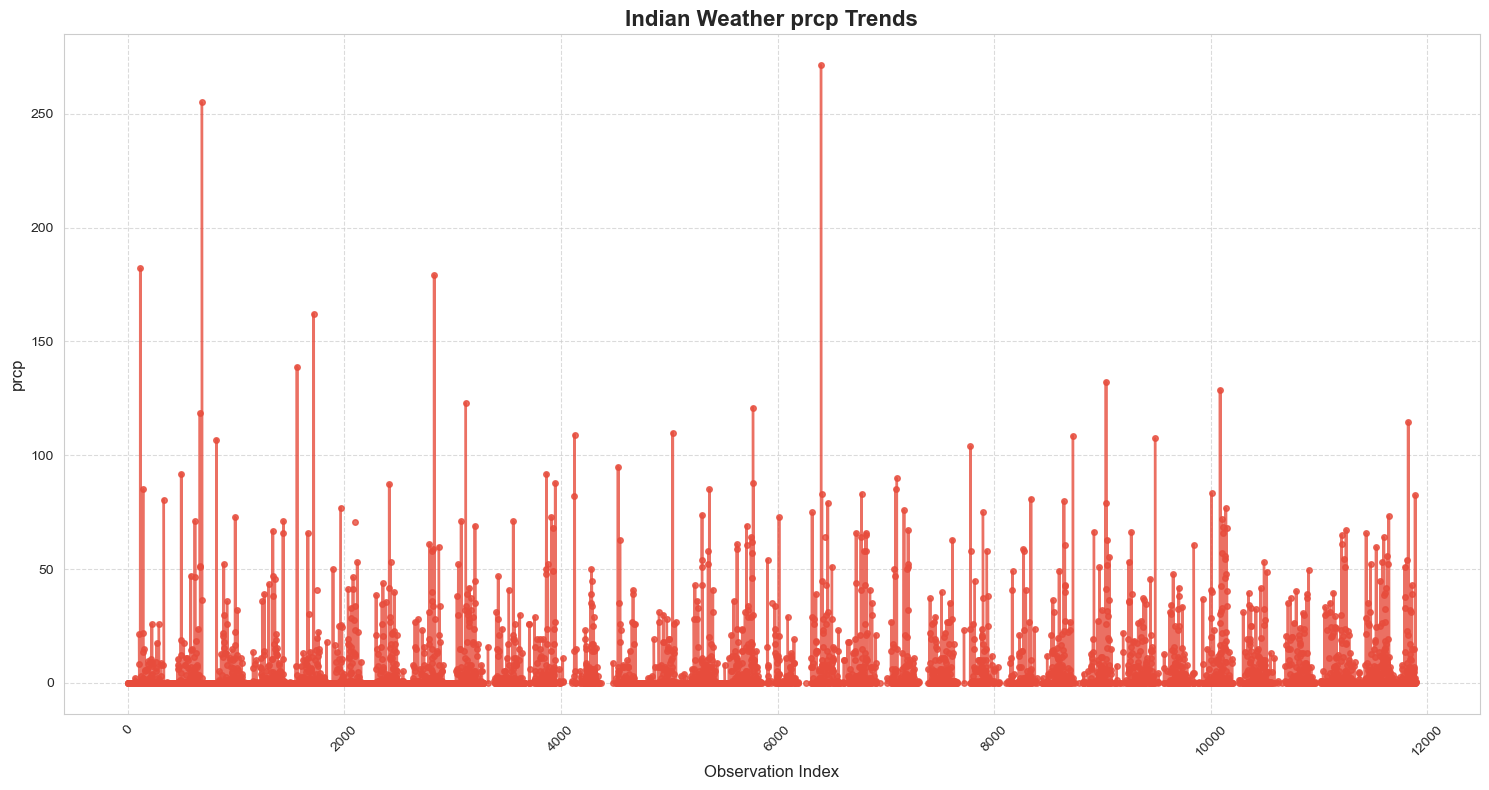


All visualizations completed successfully!
Check the PNG files in your current directory.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime, timedelta

def create_sample_data():
    """Create sample Indian weather data if no file is provided"""
    print("Creating sample Indian weather data...")
    
    # Generate sample data for major Indian cities
    cities = ['Mumbai', 'Delhi', 'Chennai', 'Kolkata', 'Bangalore']
    start_date = datetime(2025, 1, 1)
    
    data = []
    for i in range(100):  # 100 days of data
        current_date = start_date + timedelta(days=i)
        for city in cities:
            # Different temperature patterns for different cities
            if city == 'Mumbai':
                temp = 28 + 5 * np.sin(i/10) + np.random.normal(0, 2)
                humidity = 70 + np.random.normal(0, 5)
            elif city == 'Delhi':
                temp = 25 + 10 * np.sin(i/20) + np.random.normal(0, 3)
                humidity = 60 + np.random.normal(0, 8)
            elif city == 'Chennai':
                temp = 32 + 4 * np.sin(i/15) + np.random.normal(0, 2)
                humidity = 65 + np.random.normal(0, 6)
            elif city == 'Kolkata':
                temp = 30 + 6 * np.sin(i/12) + np.random.normal(0, 2)
                humidity = 75 + np.random.normal(0, 4)
            else:  # Bangalore
                temp = 26 + 4 * np.sin(i/8) + np.random.normal(0, 1.5)
                humidity = 65 + np.random.normal(0, 5)
            
            # Add some precipitation randomly
            precipitation = np.random.exponential(2) if np.random.random() < 0.3 else 0
            
            data.append({
                'Date': current_date.strftime('%Y-%m-%d'),
                'City': city,
                'Temperature': round(temp, 1),
                'Humidity': round(humidity, 1),
                'Precipitation': round(precipitation, 1)
            })
    
    # Create DataFrame and save to CSV
    df = pd.DataFrame(data)
    df.to_csv('indian_weather_data.csv', index=False)
    print("Sample data saved as 'indian_weather_data.csv'")
    return df

def main():
    print("Indian Weather Trends Visualizer")
    print("================================")
    print("Options:")
    print("1. Use existing CSV file")
    print("2. Generate sample data")
    
    choice = input("Enter your choice (1 or 2): ").strip()
    
    if choice == '1':
        # Get file path from user
        file_path = input("Please enter the path to your weather CSV file: ").strip()
        
        # Remove quotes if user dragged and dropped file
        file_path = file_path.strip('"').strip("'")
        
        try:
            # Load the dataset
            df = pd.read_csv(file_path)
            print(f"Successfully loaded data from {file_path}")
            
        except FileNotFoundError:
            print(f"Error: File '{file_path}' not found.")
            print("Please check the path and try again.")
            print("Common solutions:")
            print("- Put the CSV file in the same folder as this script")
            print("- Use forward slashes: C:/Users/Name/file.csv")
            print("- Use raw string: r'C:\\Users\\Name\\file.csv'")
            return
        except Exception as e:
            print(f"An error occurred: {str(e)}")
            return
            
    elif choice == '2':
        # Create sample data
        df = create_sample_data()
    else:
        print("Invalid choice. Using sample data instead.")
        df = create_sample_data()
    
    # Remove Date and Temperature columns if they exist
    if 'Date' in df.columns:
        df = df.drop('Date', axis=1)
        print("Removed Date column from the dataset")
    
    if 'Temperature' in df.columns:
        df = df.drop('Temperature', axis=1)
        print("Removed Temperature column from the dataset")
    
    # Check if we have any columns left to analyze
    if df.shape[1] == 0:
        print("Error: No columns left to analyze after removing Date and Temperature.")
        return
    
    print(f"\nRemaining columns in dataset: {list(df.columns)}")
    
    # Create visualizations based on remaining data
    create_visualizations(df)
    
    # City-wise analysis if City column exists
    if 'City' in df.columns:
        create_city_wise_visualizations(df)
        create_monthly_analysis(df)
    
    print("\nAll visualizations completed successfully!")
    print("Check the PNG files in your current directory.")

def create_visualizations(df):
    """Create visualizations based on remaining data"""
    sns.set_style("whitegrid")
    
    # Check what columns we have to visualize
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for visualization")
        return
    
    # Create a visualization for each numeric column
    for column in numeric_columns:
        plt.figure(figsize=(15, 8))
        
        if 'City' in df.columns:
            # Plot with different colors for each city
            cities = df['City'].unique()
            colors = plt.cm.Set3(np.linspace(0, 1, len(cities)))
            
            for i, city in enumerate(cities):
                city_data = df[df['City'] == city]
                # Use index as x-axis since we removed Date
                plt.plot(range(len(city_data)), city_data[column], 
                        marker='o', linewidth=2, markersize=3, 
                        color=colors[i], label=city, alpha=0.8)
            plt.legend()
        else:
            # Use index as x-axis since we removed Date
            plt.plot(range(len(df)), df[column], marker='o', 
                    linewidth=2, markersize=4, color='#E74C3C', alpha=0.8)
        
        plt.title(f'Indian Weather {column} Trends', fontsize=16, fontweight='bold')
        plt.xlabel('Observation Index', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'{column.lower()}_trends.png', dpi=300, bbox_inches='tight')
        plt.show()

def create_city_wise_visualizations(df):
    """Create separate visualizations for each city"""
    cities = df['City'].unique()
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for city-wise visualization")
        return
    
    for city in cities:
        city_data = df[df['City'] == city]
        
        for column in numeric_columns:
            # Create city-specific visualization
            plt.figure(figsize=(12, 6))
            # Use index as x-axis since we removed Date
            plt.plot(range(len(city_data)), city_data[column], 
                    marker='o', linewidth=2, markersize=4, color='#3498DB', alpha=0.8)
            plt.title(f'{column} Trends in {city}', fontsize=16, fontweight='bold')
            plt.xlabel('Observation Index', fontsize=12)
            plt.ylabel(column, fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(f'{column.lower()}_{city.lower()}.png', dpi=300, bbox_inches='tight')
            plt.close()
            
            # Print city statistics
            print(f"\n{city} {column} Statistics:")
            print(f"  Average {column}: {city_data[column].mean():.1f}")
            print(f"  Max {column}: {city_data[column].max():.1f}")
            print(f"  Min {column}: {city_data[column].min():.1f}")

def create_monthly_analysis(df):
    """This function is no longer applicable as we removed Date column"""
    print("Monthly analysis skipped as Date column was removed")

if __name__ == "__main__":
    main()